Setting up the simulated dataset and fwd/bwd projecting.

This demo is a jupyter notebook, i.e. intended to be run step by step.

Author: Imraj Singh

First version: 13th of May 2022

CCP SyneRBI Synergistic Image Reconstruction Framework (SIRF).
Copyright 2022 University College London.

This is software developed for the Collaborative Computational Project in Synergistic Reconstruction for Biomedical Imaging (http://www.ccpsynerbi.ac.uk/).

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

# Setting up the Ellipses dataset

This is functionality extracted from [Operator Discretization Library (ODL)](https://odlgroup.github.io/odl/index.html) and changed somewhat for our needs. The appropriate pieces of code that are used are: [here](https://github.com/odlgroup/odl/blob/master/odl/phantom/transmission.py) and [here](https://github.com/odlgroup/odl/blob/master/odl/phantom/geometric.py)

First we import the prerequisite packages.

In [1]:
# Import the PET reconstruction engine
import sirf.STIR as pet
# Set the verbosity
pet.set_verbosity(1)
# Store tempory sinograms in RAM
pet.AcquisitionData.set_storage_scheme("memory")
# Import a file that can generate the shepp logan phantom
from odl_funcs.ellipses import EllipsesDataset
import sirf
msg = sirf.STIR.MessageRedirector(info=None, warn=None, errr=None)
# Import standard extra packages
import matplotlib.pyplot as plt
import os
import numpy as np
import time
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

size_xy = 96
batch = 10
from sirf.Utilities import examples_data_path
sinogram_template = pet.AcquisitionData(examples_data_path('PET')\
                                        + '/thorax_single_slice/template_sinogram.hs');
# create acquisition model
acq_model = pet.AcquisitionModelUsingParallelproj();
image_template = sinogram_template.create_uniform_image(1.0,size_xy);
acq_model.set_up(sinogram_template,image_template);
train_dataloader = torch.utils.data.DataLoader( \
    EllipsesDataset(acq_model.forward, image_template, mode="train") \
    , batch_size=batch, shuffle=True)


Now we set up the acquisition model based upon the template meta data supplied in 'template_sinogram.hs' and we forward porject the shepp-logan phantom

In [2]:
t = time.time()
x, y = next(iter(train_dataloader))
elapsed = time.time() - t
print("Time taken to create batch of " + str(batch) + " is: " + str(elapsed))

Time taken to create batch of 10 is: 0.980776309967041


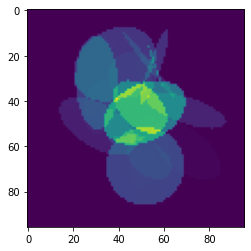

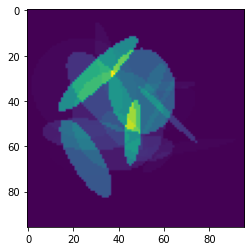

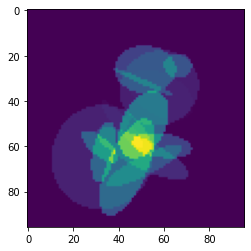

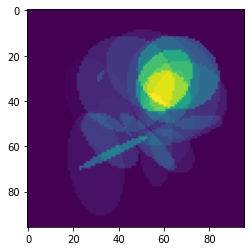

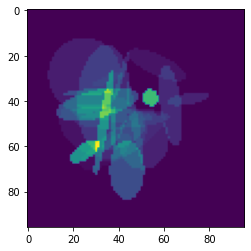

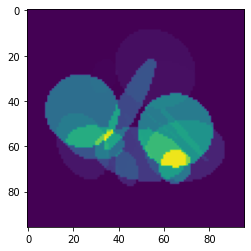

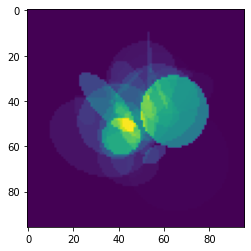

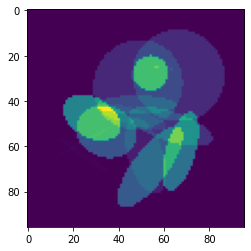

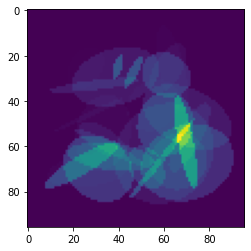

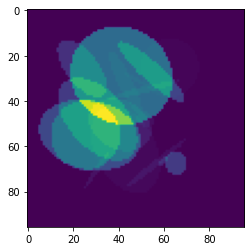

In [3]:
for img in x:
    plt.imshow(img[0])
    plt.show()

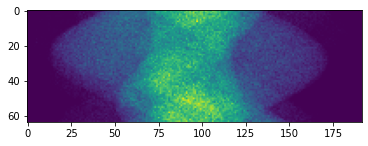

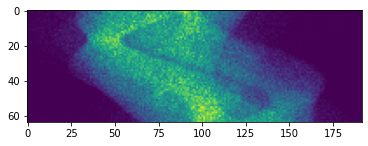

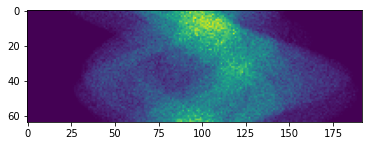

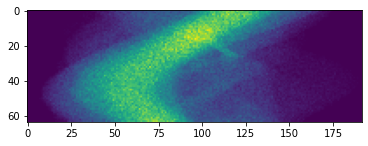

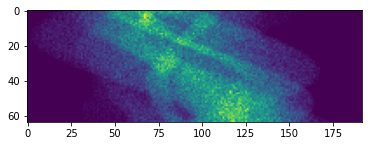

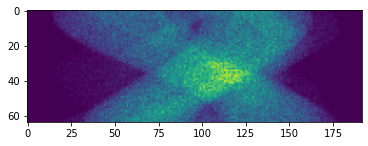

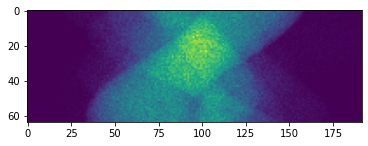

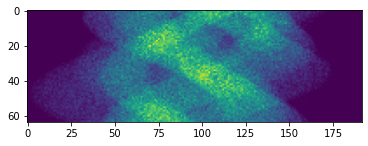

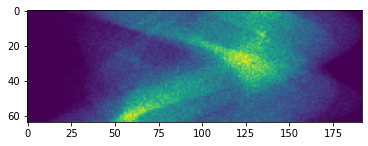

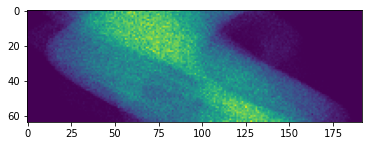

In [4]:
for i in range(10):
    plt.imshow(y[i,0,...])
    plt.show()

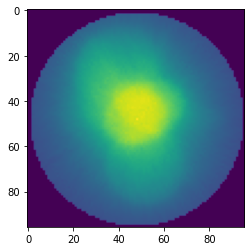

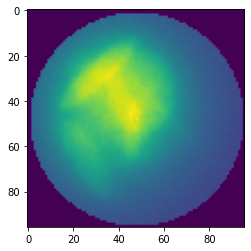

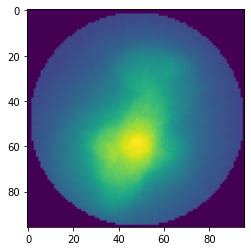

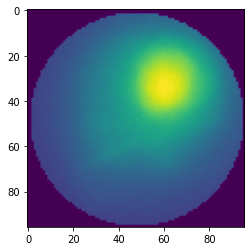

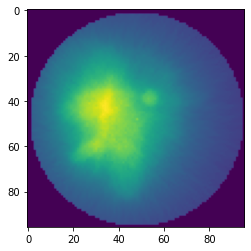

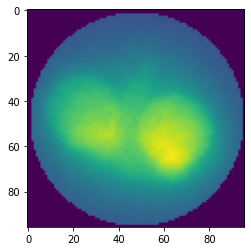

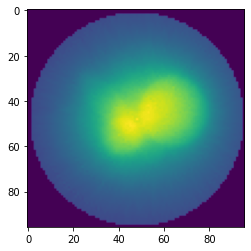

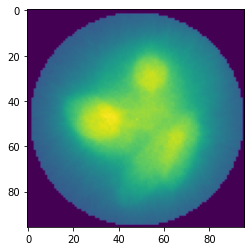

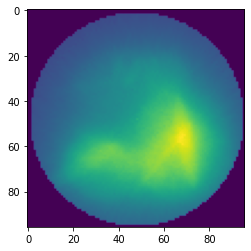

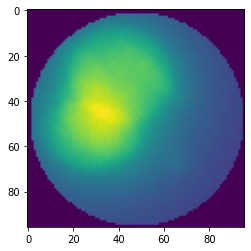

In [5]:
from sirf_torch import dual_op
bwd_op = dual_op(image_template, sinogram_template,\
                          acq_model)
x_s = bwd_op(y)
for i in range(10):
    plt.imshow(x_s[i,0,...])
    plt.show()